In [1]:
# Customer Analysis and EDA
import numpy as np   # linear algebra
import pandas as pd  # data processing
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
## Feature Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_confusion_matrix

from sklearn.ensemble import GradientBoostingClassifier
## ML Models Diffrent Algorithms

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

## Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

## Comparision of Performance of all Algorithms
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from yellowbrick.model_selection import FeatureImportances
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from scikitplot.metrics import plot_roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
# Import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import pickle
import sklearn.metrics as metrics
import scikitplot as skplt
import missingno as msno
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the dataset
df = pd.read_csv('Diabetestype.csv')

In [3]:
# first five rows in dataframe
df.head()

,Age,BS Fast,BS pp,Plasma R,Plasma F,HbA1c,Type,Class
0,50,6.8,8.8,11.2,7.2,62,Type1,1
1,31,5.2,6.8,10.9,4.2,33,Normal,0
2,32,6.8,8.8,11.2,7.2,62,Type1,1
3,21,5.7,5.8,10.7,4.8,49,Normal,0
4,33,6.8,8.8,11.2,7.2,62,Type1,1


In [4]:
# last five rows in a data frame
df.tail()

,Age,BS Fast,BS pp,Plasma R,Plasma F,HbA1c,Type,Class
1004,37,0.0,5.6,10.2,5.4,32,Normal,0
1005,23,6.3,4.2,12.2,7.8,57,Type2,1
1006,37,32.0,7.4,8.7,5.6,41,Normal,0
1007,46,19.0,6.3,7.9,3.9,40,Normal,0
1008,25,16.0,6.3,7.9,3.9,40,Normal,0


In [5]:
# shape of dataset
df.shape

(1009, 8)

In [6]:
# analyse the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1009 non-null   int64  
 1   BS Fast   1009 non-null   float64
 2   BS pp     1009 non-null   float64
 3   Plasma R  1009 non-null   float64
 4   Plasma F  1009 non-null   float64
 5   HbA1c     1009 non-null   int64  
 6   Type      1009 non-null   object 
 7   Class     1009 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 63.2+ KB


In [7]:
# full stats of the data
df.describe(include = 'all')

,Age,BS Fast,BS pp,Plasma R,Plasma F,HbA1c,Type,Class
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009,1009.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,631,NaN
mean,33.398414,12.571853,6.659167,10.728741,6.136075,43.481665,NaN,0.374628
std,11.633364,12.334019,1.205188,1.436979,1.620659,12.067515,NaN,0.484267
min,21.000000,0.000000,4.200000,7.900000,3.900000,28.000000,NaN,0.000000
25%,24.000000,5.600000,5.800000,10.200000,4.800000,33.000000,NaN,0.000000
50%,29.000000,6.700000,6.800000,10.900000,5.600000,40.000000,NaN,0.000000
75%,41.000000,20.000000,7.700000,11.400000,7.800000,53.000000,NaN,1.000000


In [8]:
# Get the count of Zeros in column 'BS Fast' 
count = (df['BS Fast'] == 0).sum()
print('Count of zeros in  BS Fast : ', count)

Count of zeros in  BS Fast :  134


In [9]:
# Replacing the zero values with mean of the column
df['BS Fast'].replace(to_replace = 0, value = df['BS Fast'].mean(), inplace=True)

In [10]:
# Get the count of Zeros in column 'BS Fast' 
count = (df['BS Fast'] == 0).sum()
print('Count of zeros in  BS Fast : ', count)

Count of zeros in  BS Fast :  0


In [11]:
# to check for missing values
df.isnull().sum()

Age         0
BS Fast     0
BS pp       0
Plasma R    0
Plasma F    0
HbA1c       0
Type        0
Class       0
dtype: int64

In [12]:
df.isnull().sum()/len(df)*100

Age         0.0
BS Fast     0.0
BS pp       0.0
Plasma R    0.0
Plasma F    0.0
HbA1c       0.0
Type        0.0
Class       0.0
dtype: float64

<AxesSubplot:>

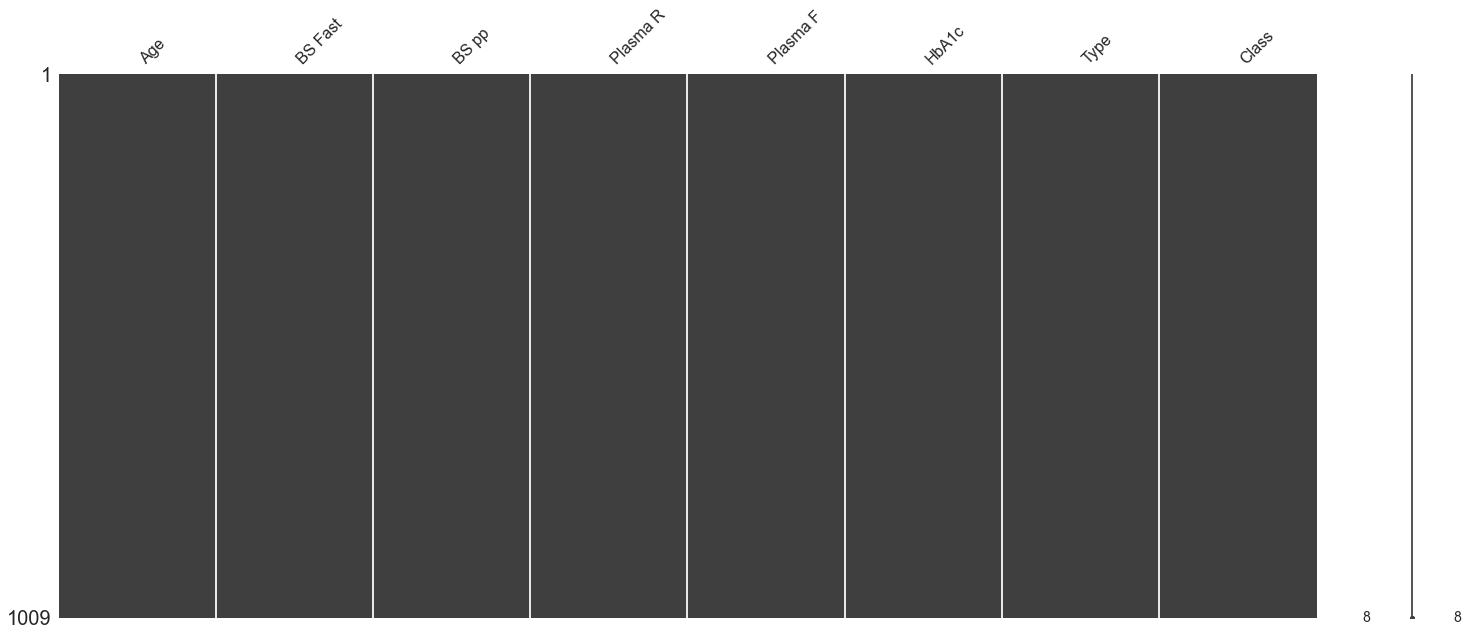

In [13]:
# to check for missing data
msno.matrix(df)

In [14]:
df.dtypes

Age           int64
BS Fast     float64
BS pp       float64
Plasma R    float64
Plasma F    float64
HbA1c         int64
Type         object
Class         int64
dtype: object

In [15]:
# Changing data type of Type and Class to Category
for col in ['Type','Class',]:
    df.loc[:,col] = df.loc[:,col].astype('category')

In [16]:
# count of target variable Type
display(pd.crosstab(index=df.loc[:,'Type'],columns='count'))

col_0,count
Type,
Normal,631
Type1,173
Type2,205


In [17]:
# count of target variable Class
display(pd.crosstab(index=df.loc[:,'Class'],columns='count'))

col_0,count
Class,
0,631
1,378


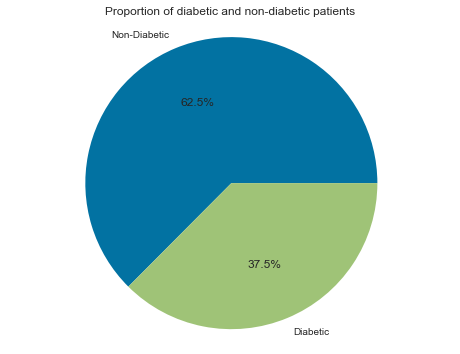

In [18]:
# pie chart to show distribution of target variable, Class
labels = 'Non-Diabetic', "Diabetic"
sizes = [df.Class[df['Class'] == 0].count(), df.Class[df['Class'] == 1].count()]
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.title("Proportion of diabetic and non-diabetic patients")
plt.show()

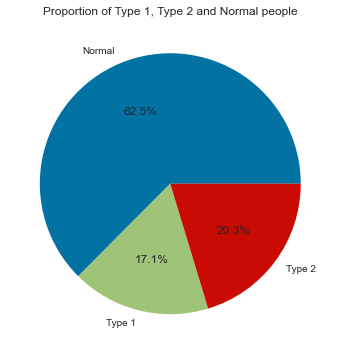

In [19]:
# pie chart to show distribution of target variable, Type
labels = 'Normal', "Type 1", "Type 2"
sizes = [df.Type[df['Type'] == "Normal"].count(), df.Type[df['Type'] == "Type1"].count(),df.Type[df['Type'] == "Type2"].count()]
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
#ax1.axis('equal')
plt.title("Proportion of Type 1, Type 2 and Normal people")
plt.show()

<AxesSubplot:xlabel='Type', ylabel='count'>

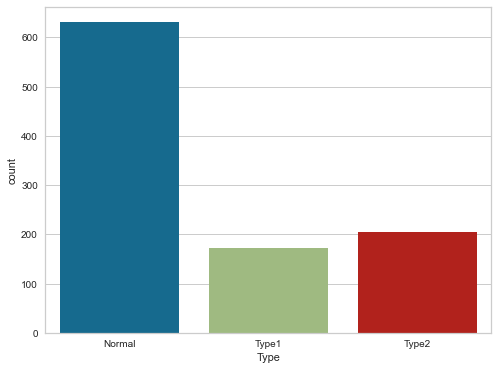

In [20]:
# to show Output Class Distribution
plt.figure(figsize=(8,6))
sns.countplot(x = 'Type',  data=df)

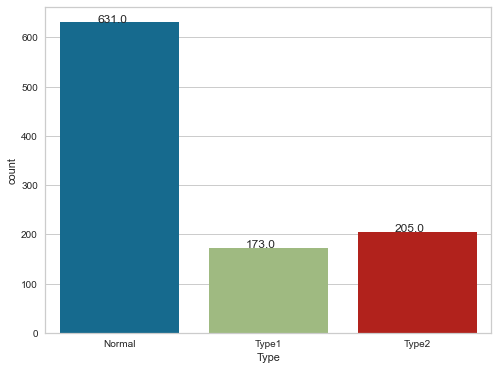

In [21]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="Type", data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'BS Fast'}>],
       [<AxesSubplot:title={'center':'BS pp'}>,
        <AxesSubplot:title={'center':'Plasma R'}>],
       [<AxesSubplot:title={'center':'Plasma F'}>,
        <AxesSubplot:title={'center':'HbA1c'}>]], dtype=object)

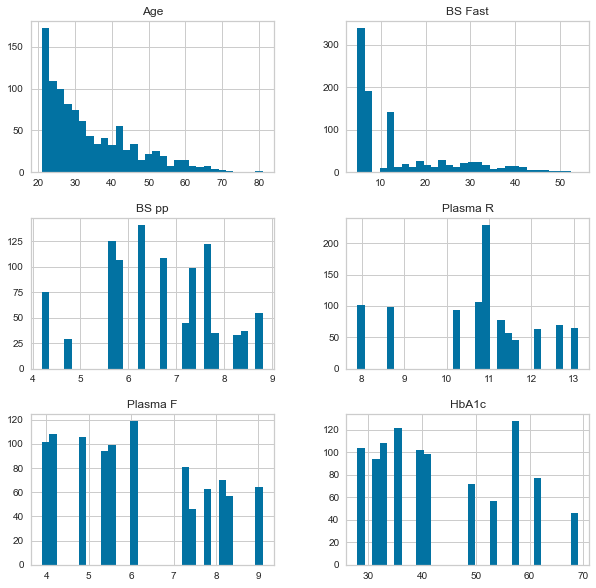

In [22]:
#Univariate Analysis of input variables
df.hist(figsize=(10,10), bins=30)

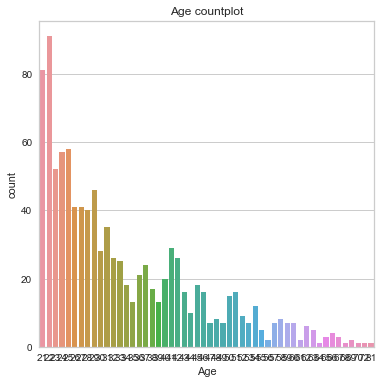

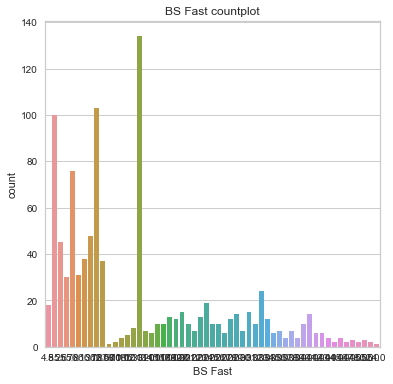

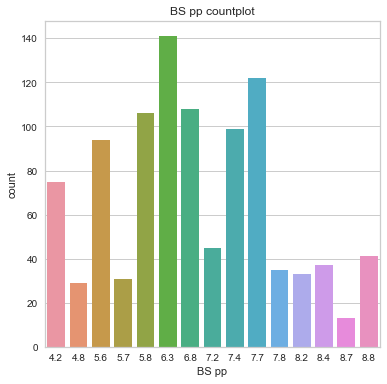

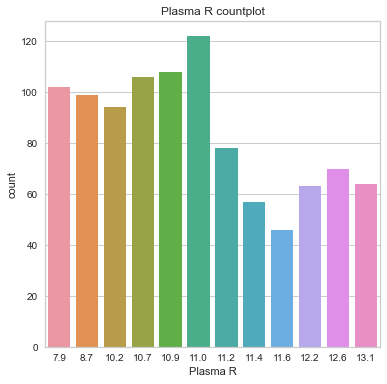

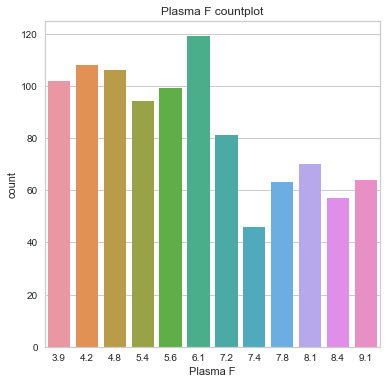

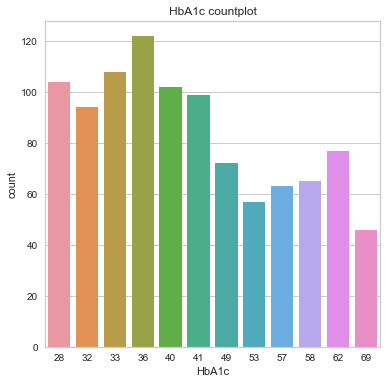

In [23]:
# countplot of input variables
for col in df.columns[:6]:
    plt.figure(figsize = (6,6))
    plt.title(f"{col} countplot")
    sns.countplot(data=df, x= col)

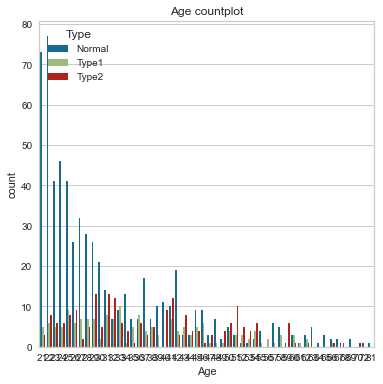

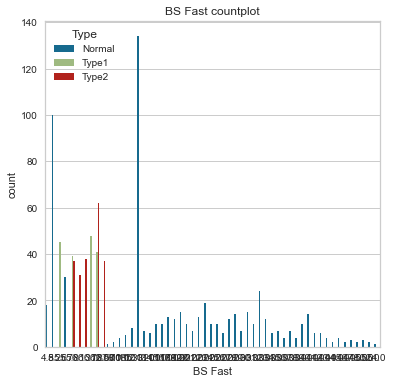

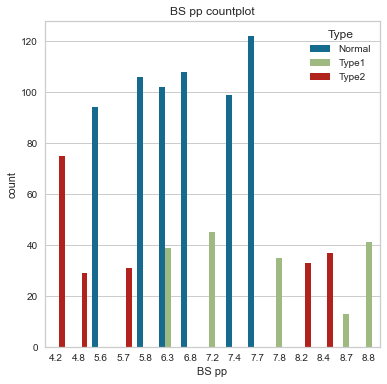

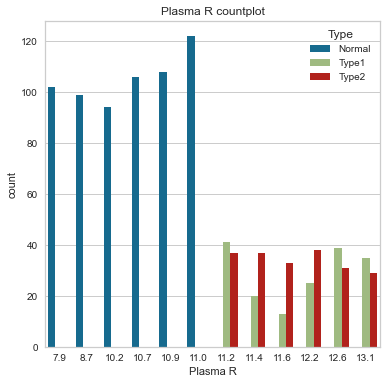

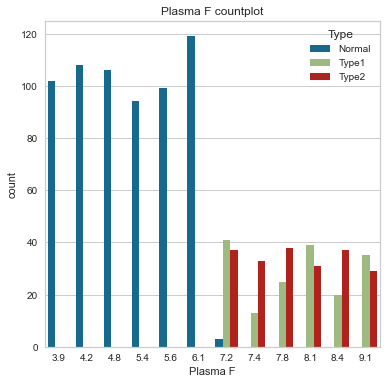

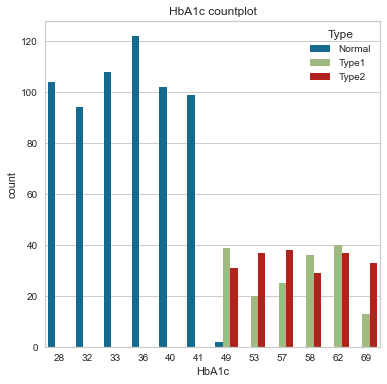

In [24]:
# countplot of input variables with respect to target variable
for col in df.columns[:6]:
    plt.figure(figsize = (6,6))
    plt.title(f"{col} countplot")
    sns.countplot(data=df, x= col,hue='Type')

<Figure size 576x432 with 0 Axes>

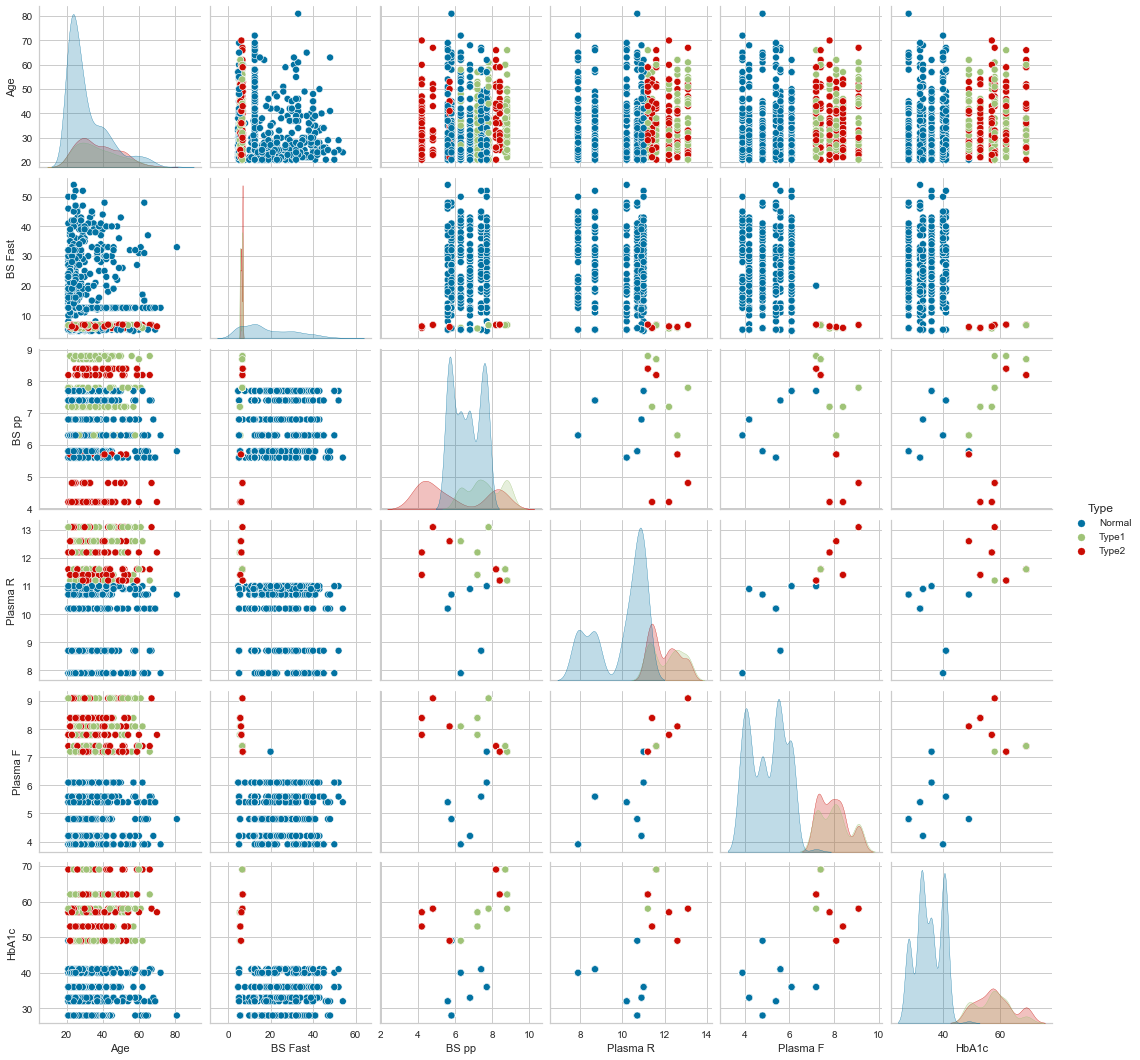

In [25]:
# Pair plot
plt.figure(figsize=(8,6))
sns.pairplot(df, hue="Type")

<AxesSubplot:>

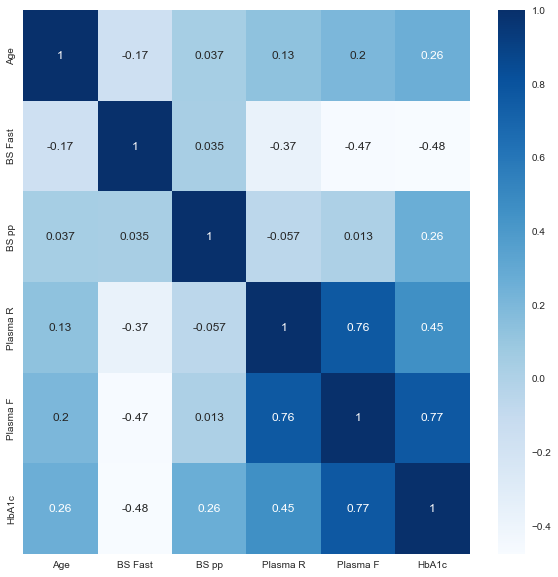

In [26]:
#heatmap to find the correlation 
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [27]:
# function to create boxplots
def boxplots (df, variables, n_rows=None, n_cols=None, hue="Type"):
    
    fig=plt.figure(figsize=(16,16))
    sns.set(palette='pastel')
    for i, var in enumerate(variables):
        ax=fig.add_subplot(n_rows, n_cols, i+1)
        sns.boxplot(y=var, x=hue, hue=hue, data=df, ax=ax).set_title(var)
    plt.show()

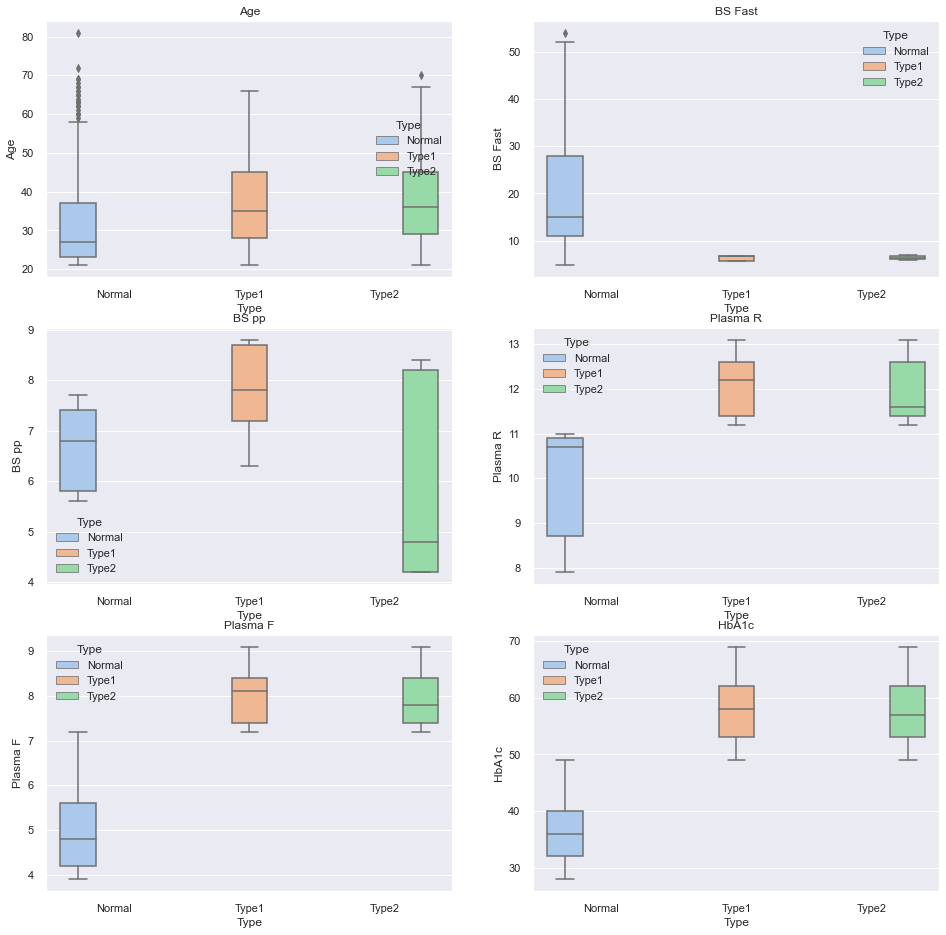

In [28]:
# plotting boxplots for checking for outliers
continue_variables = df[["Age", "BS Fast", "BS pp", "Plasma R", "Plasma F", "HbA1c"]]
boxplots(df, continue_variables,3,2)

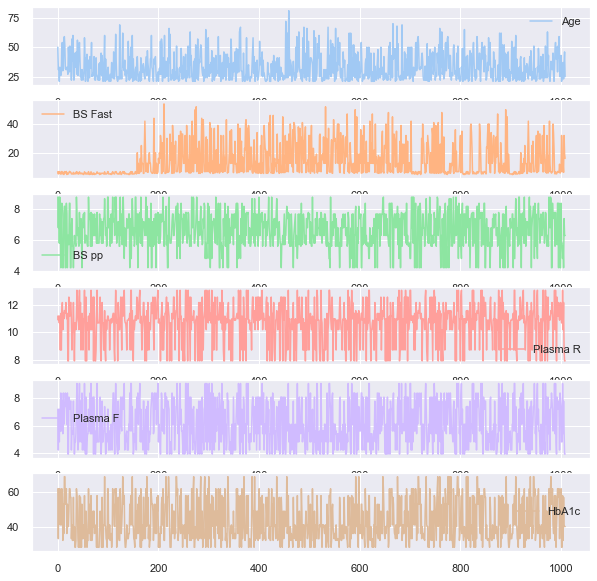

In [29]:
df.plot(subplots=True, figsize=(10, 10), sharex=False, sharey=False)
plt.show()

In [30]:
df.duplicated().sum()

386

In [31]:
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])

True
      Age    BS Fast  BS pp  Plasma R  Plasma F  HbA1c    Type Class
19     32   5.800000    4.2      11.4       8.4     53   Type2     1
46     29   5.200000    7.4       8.7       5.6     41  Normal     0
59     22   5.200000    5.6      10.2       5.4     32  Normal     0
75     22   5.200000    6.3       7.9       3.9     40  Normal     0
80     22   5.700000    5.8      10.7       4.8     28  Normal     0
...   ...        ...    ...       ...       ...    ...     ...   ...
1004   37  12.571853    5.6      10.2       5.4     32  Normal     0
1005   23   6.300000    4.2      12.2       7.8     57   Type2     1
1006   37  32.000000    7.4       8.7       5.6     41  Normal     0
1007   46  19.000000    6.3       7.9       3.9     40  Normal     0
1008   25  16.000000    6.3       7.9       3.9     40  Normal     0

[386 rows x 8 columns]


In [32]:
df.drop_duplicates(inplace=True)
print(df)

     Age  BS Fast  BS pp  Plasma R  Plasma F  HbA1c    Type Class
0     50      6.8    8.8      11.2       7.2     62   Type1     1
1     31      5.2    6.8      10.9       4.2     33  Normal     0
2     32      6.8    8.8      11.2       7.2     62   Type1     1
3     21      5.7    5.8      10.7       4.8     49  Normal     0
4     33      6.8    8.8      11.2       7.2     62   Type1     1
..   ...      ...    ...       ...       ...    ...     ...   ...
815   36      6.8    8.2      11.6       7.4     69   Type2     1
820   36     38.0    5.8      10.7       4.8     28  Normal     0
821   45     40.0    7.4       8.7       5.6     41  Normal     0
822   27     34.0    7.7      11.0       6.1     36  Normal     0
823   21     23.0    7.7      11.0       6.1     36  Normal     0

[623 rows x 8 columns]


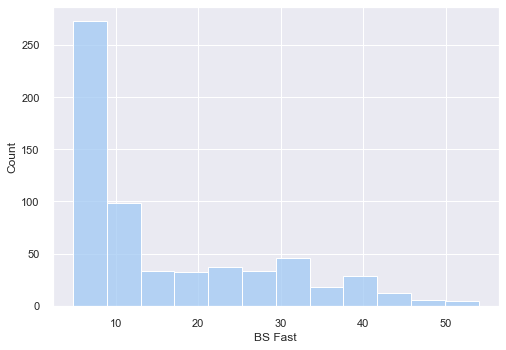

In [33]:
ax = sns.histplot(df["BS Fast"])
plt.show()

<AxesSubplot:xlabel='Age', ylabel='BS Fast'>

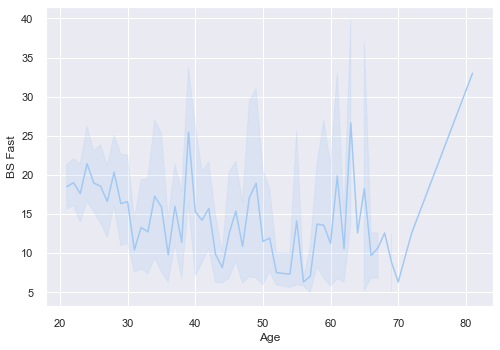

In [34]:
# plot to see the rent trend
sns.lineplot(data=df, x="Age", y="BS Fast")

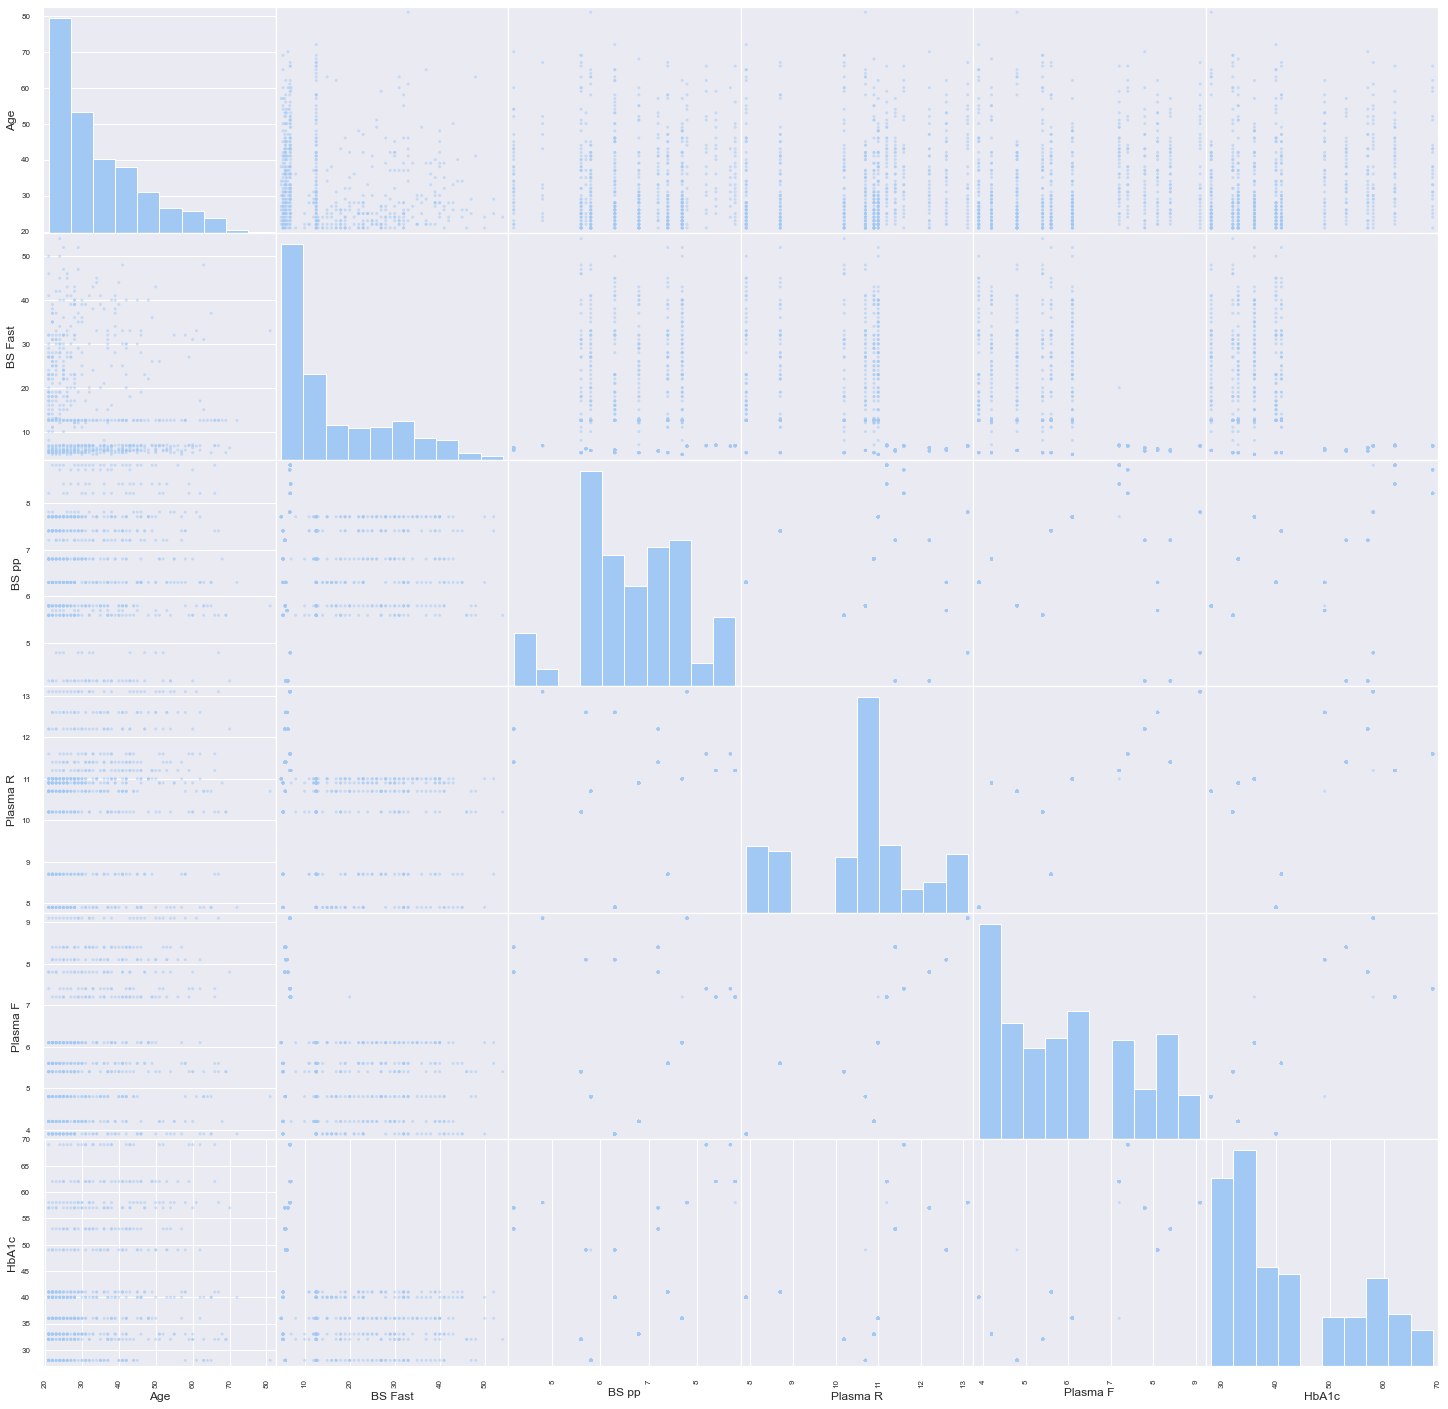

In [35]:
from pandas.plotting import scatter_matrix

p=scatter_matrix(df,figsize=(25, 25))

In [36]:
#split dataset in features and target variable
feature_cols = ['Age', 'BS Fast', 'BS pp', 'Plasma R','Plasma F','HbA1c']
X = df[feature_cols] # Features
y = df.Type # Target variable

In [37]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [38]:
type(y_test)

pandas.core.series.Series

In [39]:
# function to evaluate the model
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics as metrics
def modelling(classifiers, X_train, y_train, X_test, y_test):
      
    
   # random_probs = [0 for i in range(len(y_test))]
    plt.figure(figsize=(12, 8))
    
    for i, clf in enumerate(classifiers):
        
      
        
        model = clf
        name = clf
        
        clf.fit(X_train, y_train)
        
        y_pred=model.predict(X_test)
        
        y_score = model.predict_proba(X_test)
        random_probs = [0 for i in range(len(y_test))]
        
        #print(y_score)
            
        score = accuracy_score(y_test, y_pred)
        
        cross_val = cross_val_score(model, X_test, y_test)
        
        report = classification_report(y_test, y_pred)
        
       
        

        print(f'\n{model}')
        
        # Model Accuracy, how often is the classifier correct?
        
        
        print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
        
       
        report=classification_report(y_test,y_pred)
        print(report)
       
        
       
        
        
        skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    title="Confusion Matrix",
                                    cmap="Oranges"
                                    )
       
        plt.figure(figsize=(25,20))
        
        skplt.estimators.plot_learning_curve(model, X, y,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Cross Validation Performance Plot");
        
        print("ROC-AUC Score ", roc_auc_score(y_test,y_score,multi_class = 'ovo'))
        print("Cohen’s Kappa score ", cohen_kappa_score(y_test, y_pred))
        print("Matthew’s correlation coefficient ", matthews_corrcoef(y_test, y_pred))
        
        
       
        
        plt.show()
    

In [40]:
from sklearn.naive_bayes import GaussianNB
# list of classifers implemented
from sklearn import svm
clf_list = [
   

  # svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo',probability=True)
    svm.SVC(kernel='rbf', gamma=1, C=1, probability=True)

    , KNeighborsClassifier(),
     GaussianNB()
    

 ]



SVC(C=1, gamma=1, probability=True)
Accuracy: 0.6631016042780749
              precision    recall  f1-score   support

      Normal       0.68      1.00      0.81       123
       Type1       0.00      0.00      0.00        37
       Type2       0.25      0.04      0.06        27

    accuracy                           0.66       187
   macro avg       0.31      0.35      0.29       187
weighted avg       0.49      0.66      0.54       187

ROC-AUC Score  0.8346774959241084
Cohen’s Kappa score  0.06574147501982563
Matthew’s correlation coefficient  0.12339418378615476


<Figure size 864x576 with 0 Axes>

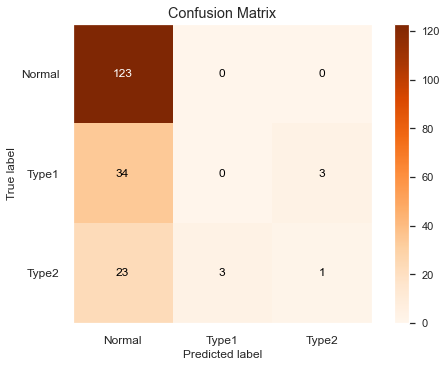

<Figure size 1800x1440 with 0 Axes>

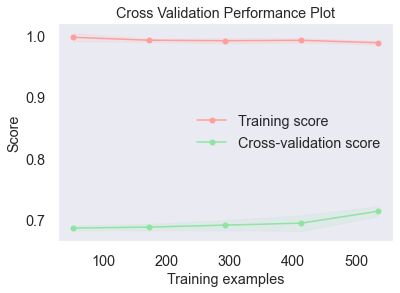


KNeighborsClassifier()
Accuracy: 0.786096256684492
              precision    recall  f1-score   support

      Normal       1.00      0.99      1.00       123
       Type1       0.47      0.38      0.42        37
       Type2       0.31      0.41      0.35        27

    accuracy                           0.79       187
   macro avg       0.59      0.59      0.59       187
weighted avg       0.80      0.79      0.79       187

ROC-AUC Score  0.8039204516169285
Cohen’s Kappa score  0.5823095823095823
Matthew’s correlation coefficient  0.5841798446377187


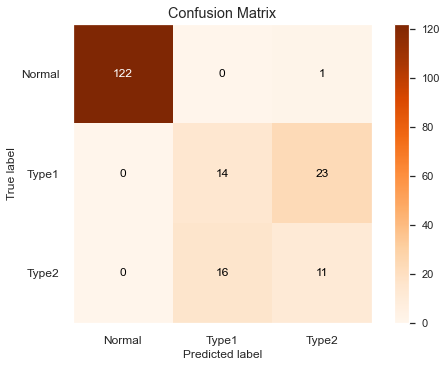

<Figure size 1800x1440 with 0 Axes>

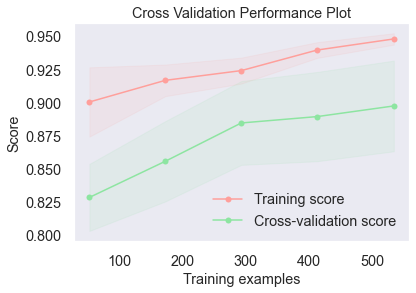


GaussianNB()
Accuracy: 0.8823529411764706
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       123
       Type1       0.68      0.76      0.72        37
       Type2       0.61      0.52      0.56        27

    accuracy                           0.88       187
   macro avg       0.76      0.76      0.76       187
weighted avg       0.88      0.88      0.88       187

ROC-AUC Score  0.8902235568902235
Cohen’s Kappa score  0.7675968817082816
Matthew’s correlation coefficient  0.7682951552328701


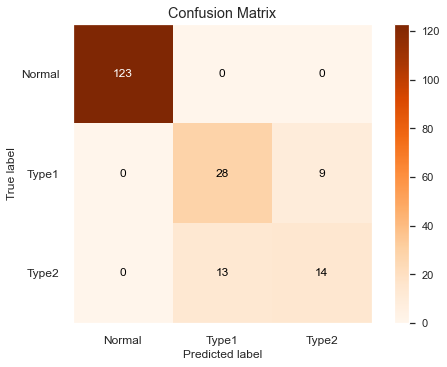

<Figure size 1800x1440 with 0 Axes>

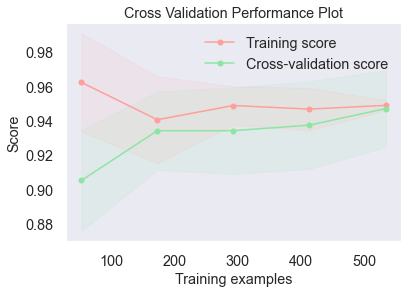

In [41]:
# evaluating the classifiers on imbalanced data
modelling(
    clf_list
    , X_train=X_train
    , X_test=X_test
    , y_train=y_train
    , y_test=y_test
)

# Machine Learning Models implementation using Stratified K Fold Cross Validation

In [42]:
skf = StratifiedKFold(n_splits=5,random_state=None,shuffle=False)

for train_index,test_index in skf.split(X,y):
    #print("Train:",train_index,'Test:',test_index)
    X_train_cv,X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv,y_test_cv = y.iloc[train_index], y.iloc[test_index]


SVC(C=1, gamma=1, probability=True)
Accuracy: 0.7096774193548387
              precision    recall  f1-score   support

      Normal       0.73      1.00      0.84        85
       Type1       0.67      0.10      0.17        20
       Type2       0.25      0.05      0.09        19

    accuracy                           0.71       124
   macro avg       0.55      0.38      0.37       124
weighted avg       0.64      0.71      0.62       124

ROC-AUC Score  0.8478070175438597
Cohen’s Kappa score  0.15694050991501418
Matthew’s correlation coefficient  0.237117329344583


<Figure size 864x576 with 0 Axes>

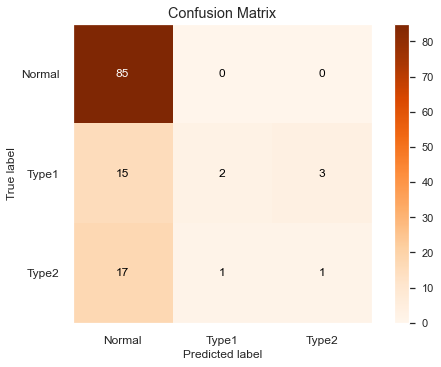

<Figure size 1800x1440 with 0 Axes>

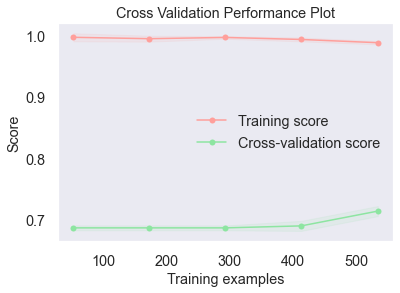


KNeighborsClassifier()
Accuracy: 0.8548387096774194
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        85
       Type1       0.55      0.55      0.55        20
       Type2       0.53      0.53      0.53        19

    accuracy                           0.85       124
   macro avg       0.69      0.69      0.69       124
weighted avg       0.85      0.85      0.85       124

ROC-AUC Score  0.8627192982456141
Cohen’s Kappa score  0.6979702300405954
Matthew’s correlation coefficient  0.6979702300405954


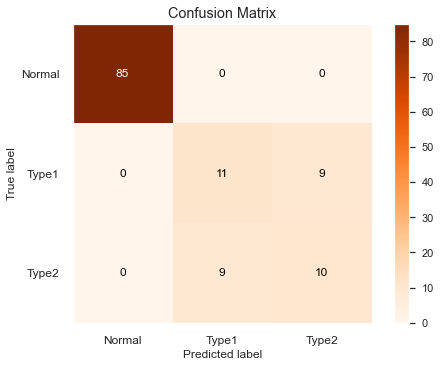

<Figure size 1800x1440 with 0 Axes>

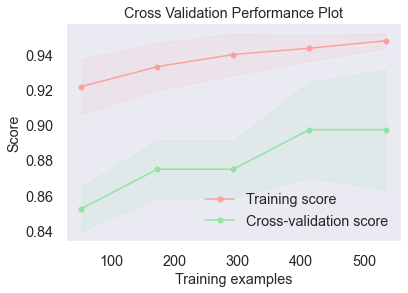


GaussianNB()
Accuracy: 0.9274193548387096
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        85
       Type1       0.79      0.75      0.77        20
       Type2       0.75      0.79      0.77        19

    accuracy                           0.93       124
   macro avg       0.85      0.85      0.85       124
weighted avg       0.93      0.93      0.93       124

ROC-AUC Score  0.9517543859649122
Cohen’s Kappa score  0.8490055472872412
Matthew’s correlation coefficient  0.8491204330175913


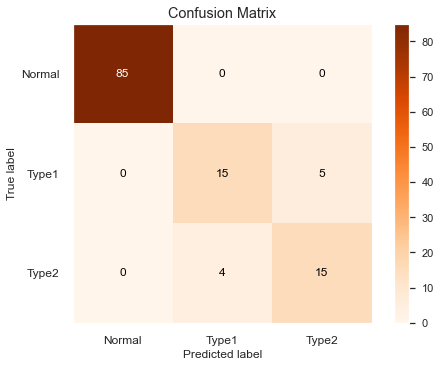

<Figure size 1800x1440 with 0 Axes>

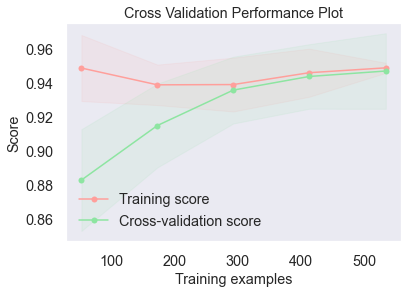

In [43]:
# evaluating the classifiers on imbalanced data and Stratified K FOld Validation
modelling(
    clf_list
    , X_train=X_train_cv
    , X_test=X_test_cv
    , y_train=y_train_cv
    , y_test=y_test_cv
)

In [44]:
# function to predict feature importance
def feature_importance(classifiers):
    for i, clf in enumerate(classifiers):
        model = clf
        viz = FeatureImportances(model)
        viz.fit(X, y)
        viz.show()

In [45]:
# list of classifiers used for finding feature importance
classifier_list = [
    
    GradientBoostingClassifier(random_state=1),


 ]


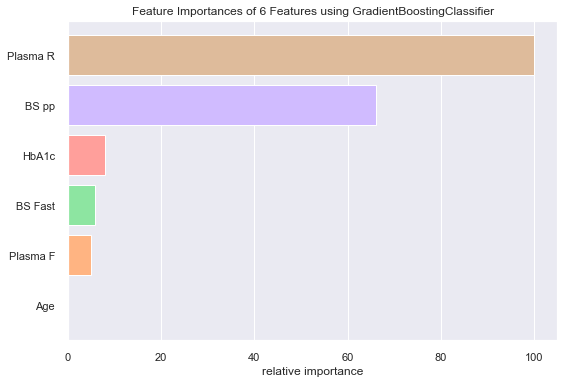

In [46]:
# checking the feature importance
feature_importance(classifier_list)

# Over Sampling the dataset using SMOTE

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
# Over sampling using SMOTE
sm=SMOTE(
    sampling_strategy='auto'
    , random_state=1
)

In [49]:
X_sm, y_sm = sm.fit_resample(X,y)
y_sm.value_counts()

Normal    428
Type1     428
Type2     428
Name: Type, dtype: int64


SVC(C=1, gamma=1, probability=True)
Accuracy: 0.9732620320855615
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       123
       Type1       0.94      0.92      0.93        37
       Type2       0.89      0.93      0.91        27

    accuracy                           0.97       187
   macro avg       0.95      0.95      0.95       187
weighted avg       0.97      0.97      0.97       187

ROC-AUC Score  0.9969969969969971
Cohen’s Kappa score  0.9473298783235692
Matthew’s correlation coefficient  0.9473833677828659


<Figure size 864x576 with 0 Axes>

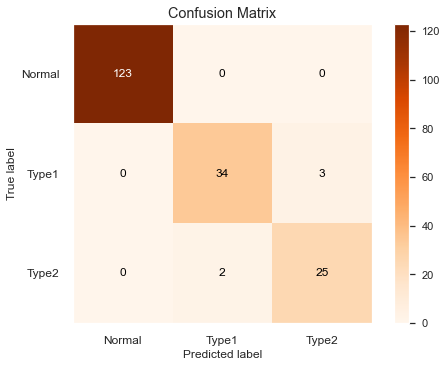

<Figure size 1800x1440 with 0 Axes>

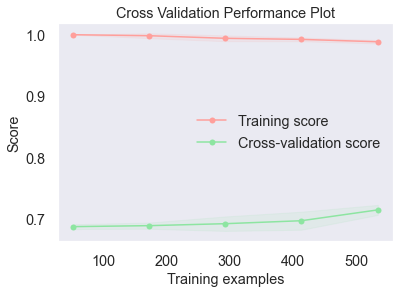


KNeighborsClassifier()
Accuracy: 0.9572192513368984
              precision    recall  f1-score   support

      Normal       1.00      0.99      1.00       123
       Type1       0.89      0.89      0.89        37
       Type2       0.86      0.89      0.87        27

    accuracy                           0.96       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.96      0.96      0.96       187

ROC-AUC Score  0.9904653976469694
Cohen’s Kappa score  0.9161340957506448
Matthew’s correlation coefficient  0.9161984518947018


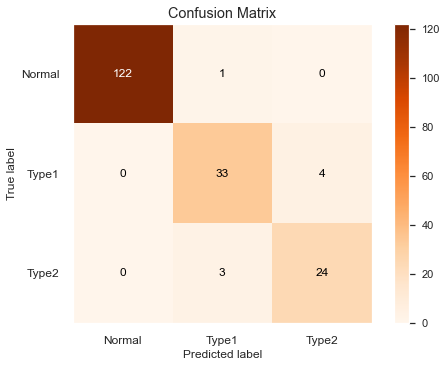

<Figure size 1800x1440 with 0 Axes>

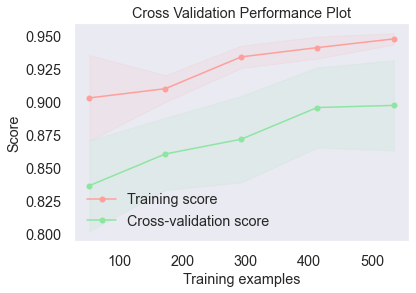


GaussianNB()
Accuracy: 0.9411764705882353
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       123
       Type1       0.81      0.92      0.86        37
       Type2       0.86      0.70      0.78        27

    accuracy                           0.94       187
   macro avg       0.89      0.87      0.88       187
weighted avg       0.94      0.94      0.94       187

ROC-AUC Score  0.9679679679679679
Cohen’s Kappa score  0.883732760569749
Matthew’s correlation coefficient  0.8849912767825887


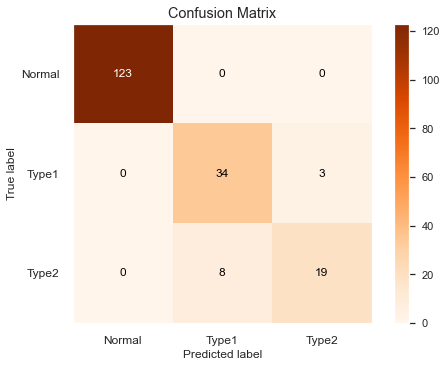

<Figure size 1800x1440 with 0 Axes>

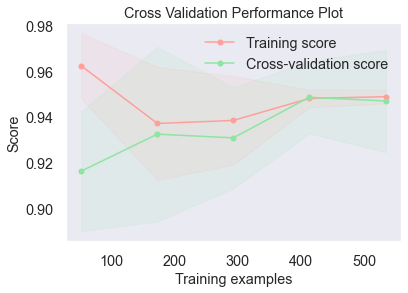

In [50]:
modelling(
    clf_list
    , X_train=X_sm
    , y_train=y_sm
    , X_test=X_test
    , y_test=y_test
)

# Multi Layer Perceptron Classifier (MLP)

In [51]:
# Creating labelEncoder
le = preprocessing.LabelEncoder()

In [52]:
# Spliting data into Feature and
x_data = df.drop(['Type','Class'],axis=1)
y_data = df['Type']
df['Type ']=le.fit_transform(df['Type'])

# Split dataset into training set and test set
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(x_data, y_data, test_size=0.3, random_state=42)  # 70% training and 30% test

In [53]:
# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier

# Create model object
clf_mlp = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    activation = 'relu',
                    learning_rate_init=0.01)

# Fit data onto the model
clf_mlp.fit(X_train_mlp,y_train_mlp)

Iteration 1, loss = 1.22308662
Iteration 2, loss = 0.84398768
Iteration 3, loss = 0.62787548
Iteration 4, loss = 0.56619120
Iteration 5, loss = 0.51792508
Iteration 6, loss = 0.48775431
Iteration 7, loss = 0.52631344
Iteration 8, loss = 0.44063945
Iteration 9, loss = 0.42090279
Iteration 10, loss = 0.40234078
Iteration 11, loss = 0.40730596
Iteration 12, loss = 0.40906912
Iteration 13, loss = 0.37584718
Iteration 14, loss = 0.36390248
Iteration 15, loss = 0.36028450
Iteration 16, loss = 0.37464982
Iteration 17, loss = 0.33168172
Iteration 18, loss = 0.31767926
Iteration 19, loss = 0.32108702
Iteration 20, loss = 0.32264350
Iteration 21, loss = 0.33883754
Iteration 22, loss = 0.30035373
Iteration 23, loss = 0.30100854
Iteration 24, loss = 0.29554818
Iteration 25, loss = 0.28493164
Iteration 26, loss = 0.28820820
Iteration 27, loss = 0.28297927
Iteration 28, loss = 0.28044221
Iteration 29, loss = 0.30498968
Iteration 30, loss = 0.29686559
Iteration 31, loss = 0.31159471
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [54]:
# Make prediction on test dataset
mlp_pred=clf_mlp.predict(X_test_mlp)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:")
print(confusion_matrix(y_test_mlp, mlp_pred))
print("Classification Report:")
print(classification_report(y_test_mlp, mlp_pred))
print("Accuaracy", accuracy_score(y_test_mlp,mlp_pred))

Confusion Matrix:
[[132   0   0]
 [  0  22   3]
 [  0   2  28]]
Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       132
       Type1       0.92      0.88      0.90        25
       Type2       0.90      0.93      0.92        30

    accuracy                           0.97       187
   macro avg       0.94      0.94      0.94       187
weighted avg       0.97      0.97      0.97       187

Accuaracy 0.9732620320855615


In [ ]:
import pandas as pd

# Load the dataset
df_mlp = pd.read_csv('Diabetestype.csv')

print(df_mlp)
from sklearn.model_selection import train_test_split
X = df_mlp.drop(["Type","Class"], axis=1)
y = df_mlp[['Type']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)
# Storing input and output attributes in variables X and Y
X = df_mlp.drop(["Type","Class"], axis=1)
y = df_mlp["Type"]
# Partitioning the data for testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

mlp = MLPClassifier(max_iter=2000,random_state=0)

param_space = {
    'hidden_layer_sizes': [(150,150,150), (150,200,150), (200,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001,0.05],
    'learning_rate': ['constant', 'adaptive'],
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, param_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)
#Best Parameter set
print('Best Parameters found: \n', clf.best_params_)
# Results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print('%.3f (+/-%.03f) for %r' % (mean, std * 2, params))
    
y_actual, y_pred = y_test, clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print('Results on the test set: ')
print(classification_report(y_actual, y_pred))
report = classification_report(y_actual, y_pred, output_dict=True)
df_mlp_report = pd.DataFrame(report)
y_pred = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

y_pred = clf.predict(X_test)
import pickle   
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)


import tkinter as tk

from tkinter import ttk

app = tk.Tk()

app.title('Diabetes Type Predictions') 

#Column 1 
Age=ttk.Label(app,text="Age")
Age.grid(row=0,column=0,sticky=tk.W)
Age_var=tk.StringVar()
Age_entrybox=ttk.Entry(app,width=16,textvariable=Age_var)
Age_entrybox.grid(row=0,column=1)


#Column 2
BSFast=ttk.Label(app,text="BS Fast")
BSFast.grid(row=1,column=0,sticky=tk.W)
BSFast_var=tk.StringVar()
BSFast_entrybox=ttk.Entry(app,width=16,textvariable=BSFast_var)
BSFast_entrybox.grid(row=1,column=1)


#Column 3
BSpp=ttk.Label(app,text="BS PP")
BSpp.grid(row=2,column=0,sticky=tk.W)
BSpp_var=tk.StringVar()
BSpp_entrybox=ttk.Entry(app,width=16,textvariable=BSpp_var)
BSpp_entrybox.grid(row=2,column=1)


#Column 4
PlasmaR=ttk.Label(app,text="Plasma R")
PlasmaR.grid(row=3,column=0,sticky=tk.W)
PlasmaR_var=tk.StringVar()
PlasmaR_entrybox=ttk.Entry(app,width=16,textvariable=PlasmaR_var)
PlasmaR_entrybox.grid(row=3,column=1)


#Column 5
PlasmaF=ttk.Label(app,text="Plasma F")
PlasmaF.grid(row=4,column=0,sticky=tk.W)
PlasmaF_var=tk.StringVar()
PlasmaF_entrybox=ttk.Entry(app,width=16,textvariable=PlasmaF_var)
PlasmaF_entrybox.grid(row=4,column=1)


#Column 6
HbA1c=ttk.Label(app,text="HbA1c")
HbA1c.grid(row=5,column=0,sticky=tk.W)
HbA1c_var=tk.StringVar()
HbA1c_entrybox=ttk.Entry(app,width=16,textvariable=HbA1c_var)
HbA1c_entrybox.grid(row=5,column=1)


import pandas as pd
data = pd.DataFrame()



    


def Output():
    
    global DB
    import pandas as pd
    data = pd.DataFrame(columns=['Age','BS Fast','BS pp','Plasma R','Plasma F','HbA1c'])
    AGE=Age_var.get()
    data.loc[0,'Age']=AGE
    
    BSFAST=BSFast_var.get()
    data.loc[0,'BS Fast']=BSFAST
    
    BSPP=BSpp_var.get()
    data.loc[0,'BS pp']=BSPP
    
    PLASMAR=PlasmaR_var.get()
    data.loc[0,'Plasma R']=PLASMAR
    
    PLASMAF=PlasmaF_var.get()
    data.loc[0,'Plasma F']=PLASMAF
    
    HbA1c=HbA1c_var.get()
    data.loc[0,'HbA1c']=HbA1c
   
    
    print(data.shape)

    DB=data
    
    DB["Age"] = pd.to_numeric(DB["Age"])
    DB["BS Fast"] = pd.to_numeric(DB["BS Fast"])
    DB["BS pp"] = pd.to_numeric(DB["BS pp"])
    DB["Plasma R"] = pd.to_numeric(DB["Plasma R"])
    DB["Plasma F"] = pd.to_numeric(DB["Plasma F"])
    DB["HbA1c"] = pd.to_numeric(DB["HbA1c"])


    output=clf.predict(DB)

    if output=="Type1":
        result='Type 1 Diabetic'
        
    elif output=="Type2":
        result='Type 2 Diabetic'
    
    elif output=="Normal":
        result = 'Non - Diabetic'
    
    Predict_entrybox=ttk.Entry(app,width=16)
    Predict_entrybox.grid(row=20,column=1)
    Predict_entrybox.insert(1,str(result))
    
Predict_button=ttk.Button(app,text="Predict",command=Output)
Predict_button.grid(row=20,column=0)
    
app.mainloop()



    

      Age  BS Fast  BS pp  Plasma R  Plasma F  HbA1c    Type  Class
0      50      6.8    8.8      11.2       7.2     62   Type1      1
1      31      5.2    6.8      10.9       4.2     33  Normal      0
2      32      6.8    8.8      11.2       7.2     62   Type1      1
3      21      5.7    5.8      10.7       4.8     49  Normal      0
4      33      6.8    8.8      11.2       7.2     62   Type1      1
...   ...      ...    ...       ...       ...    ...     ...    ...
1004   37      0.0    5.6      10.2       5.4     32  Normal      0
1005   23      6.3    4.2      12.2       7.8     57   Type2      1
1006   37     32.0    7.4       8.7       5.6     41  Normal      0
1007   46     19.0    6.3       7.9       3.9     40  Normal      0
1008   25     16.0    6.3       7.9       3.9     40  Normal      0

[1009 rows x 8 columns]
(676, 6)
(333, 6)
Best Parameters found: 
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (200,), 'learning_rate': 'constant', 'solver': 'adam'}